# Hough Lines and Circles

In this notebook, I'm going to try detect edges and circles of a target.

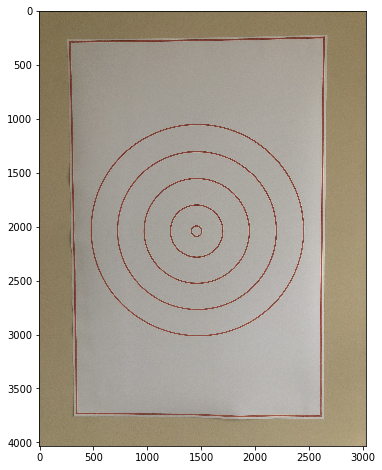

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Set the default figure size
plt.rcParams['figure.figsize'] = [16,8]

# read in image
image = cv2.imread('images/template.jpeg')

# change color to RGB from BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# display image
plt.imshow(image)

### Perform Edge Detection and Blur 

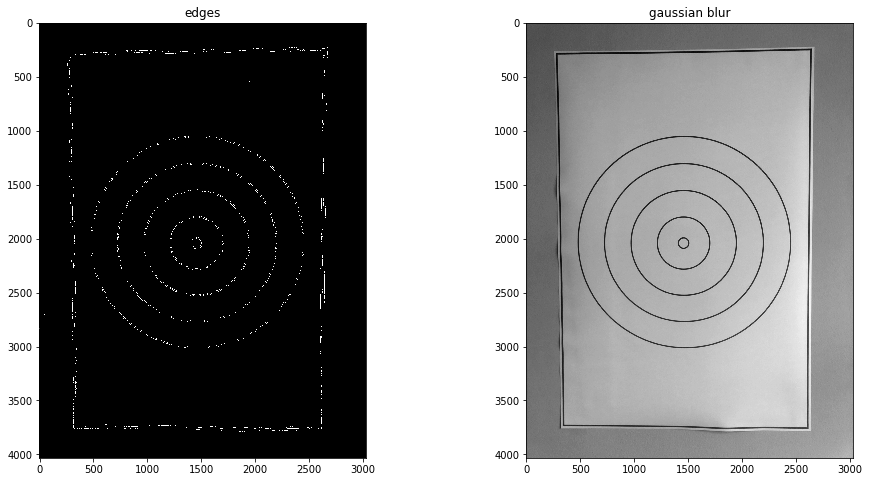

In [67]:
# convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# define parameters for Canny
low_threshold = 60
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

# blur
gray_blur = cv2.GaussianBlur(gray, (9,9), 0)

# show images
figure, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('edges')
ax1.imshow(edges, cmap='gray')

ax2.set_title('gaussian blur')
ax2.imshow(gray_blur, cmap='gray')

### Find Lines Using a Hough Transform

There are 16 lines detected


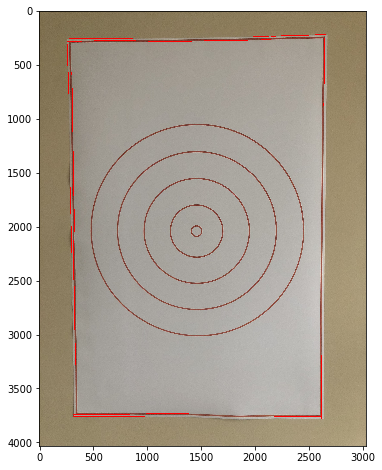

In [68]:
# define Hough transform parameters
rho = 10
theta = np.pi/180
threshold = 60
min_line_length = 500
max_line_gap = 100

# image copy to draw line on
lines_image = np.copy(image)

# run Hough line on edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# iterate over the output "lines" and draw lines o nthe image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(lines_image, (x1,y1), (x2,y2), (255,0,0),5)
        
# show image with lines
plt.imshow(lines_image)
print('There are {} lines detected'.format(len(lines)))

The edge lines of the target are being detected. The trick is to set minimum line length longer, so that it doesn't pick up circles. Multiple lines on each edge are detected. Double edges are being detected, meaning edge of the paper and edges of red lines. Possible solutions could be k-means segmentation of an image with three clusters ( white paper, red markings, and background). This would allow to mask everithg but red markings and perform line detection on thouse.

### Perform Circle Detection

There are 23 circles detected


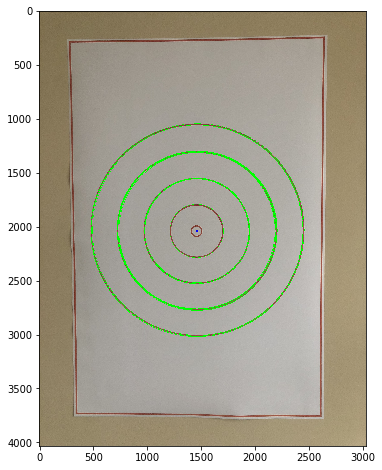

In [90]:
# image copy to draw circles on
circles_image = np.copy(image)

# run Hough circles on gray blurred image
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1,
                           minDist=1,
                           param1=180,
                           param2=600,
                           minRadius=5,
                           maxRadius=2000)

# convert circles into expected type 
circles = np.uint16(np.around(circles))

# draw each circle
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_image,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_image,(i[0],i[1]),2,(0,0,255),3)

# show image with circles
plt.imshow(circles_image)
print('There are {} circles detected'.format(len(circles[0])))

The circles get detected with good parameter adjustment. The same circles get detected multiple time. This is okay be cleaned up with radius checks and removal of multiple circles with similar radii. One issue is that the most center circle is not getting detected, even with parameter adjusting.

<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
My Solution</p><br>

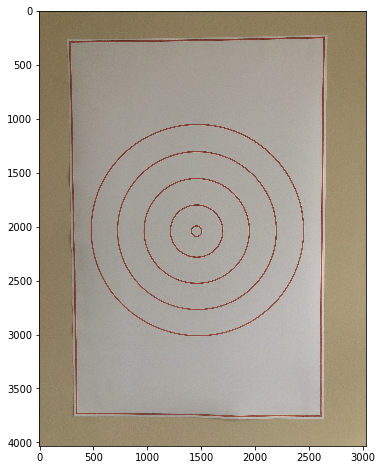

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Set the default figure size
plt.rcParams['figure.figsize'] = [16,8]

# read in image
image = cv2.imread('images/template.jpeg')

# change color to RGB from BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# display image
plt.imshow(image)

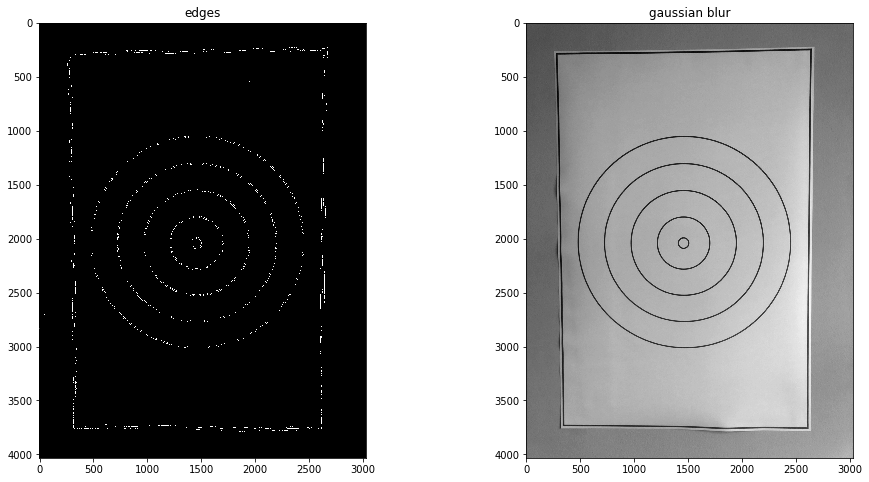

In [8]:
# convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# define parameters for Canny
low_threshold = 60
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

# blur
gray_blur = cv2.GaussianBlur(gray, (9,9), 0)

# show images
figure, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('edges')
ax1.imshow(edges, cmap='gray')

ax2.set_title('gaussian blur')
ax2.imshow(gray_blur, cmap='gray')

Circles shape:  (1, 29, 3)


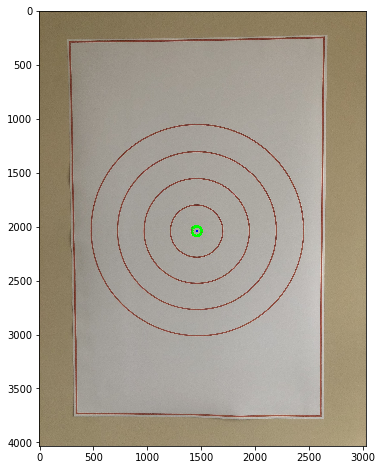

In [33]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=1,
                           param1=240,
                           param2=20,
                           minRadius=20,
                           maxRadius=50)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)

## Another method

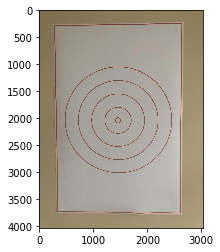

In [34]:
# First import OpenCV, NumPY and MatPlotLib as we will use these libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load a color image
img = cv2.imread("images/template.jpeg")

# h is the Parameter regulating filter strength for luminance component. 
# Bigger h value perfectly removes noise but also removes image details, 
# smaller h value preserves details but also preserves some noise
hColor = h = 20
    
# Default values
templateWindowSize = 7
searchWindowSize = 21

#Image denoising by 'cv2.fastNlMeansDenoisingColored'
blur = cv2.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
    
plt.imshow(blur)

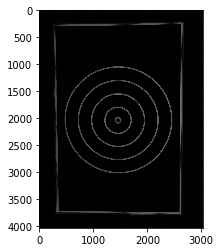

In [35]:
# Apply a morphological gradient (dilate the image, erode the image, and take the difference
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))

# Use openCV's morphologyEx to generate a gradient using the kernel above
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, elKernel)

plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))

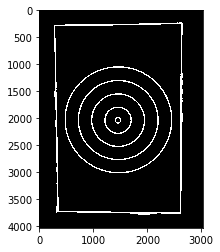

In [36]:
# Convert gradient to grayscale
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)

#  Generate a matrix called otsu using OpenCV's threshold() function.  Use
otsu = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
       
# Apply a closing operation - we're using a large kernel here. By all means adjust the size of this kernel
# and observe the effects
closingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (33,33))
close = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, closingKernel)
plt.imshow(close, cmap='gray')

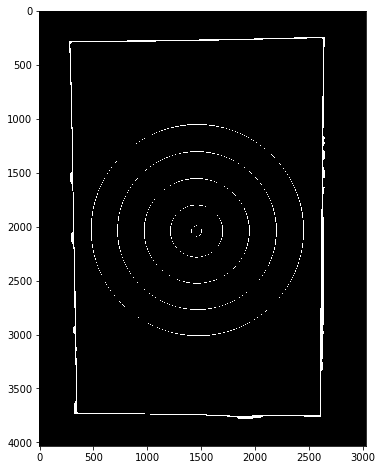

In [101]:
# blur
gray_blur = cv2.GaussianBlur(gray, (9,9), 0)

# Erode smaller artefacts out of the image - play with iterations to see how it works
eroded = cv2.erode(close, None, iterations=8)

plt.imshow(eroded, cmap='gray')

Circles shape:  (1, 295, 3)


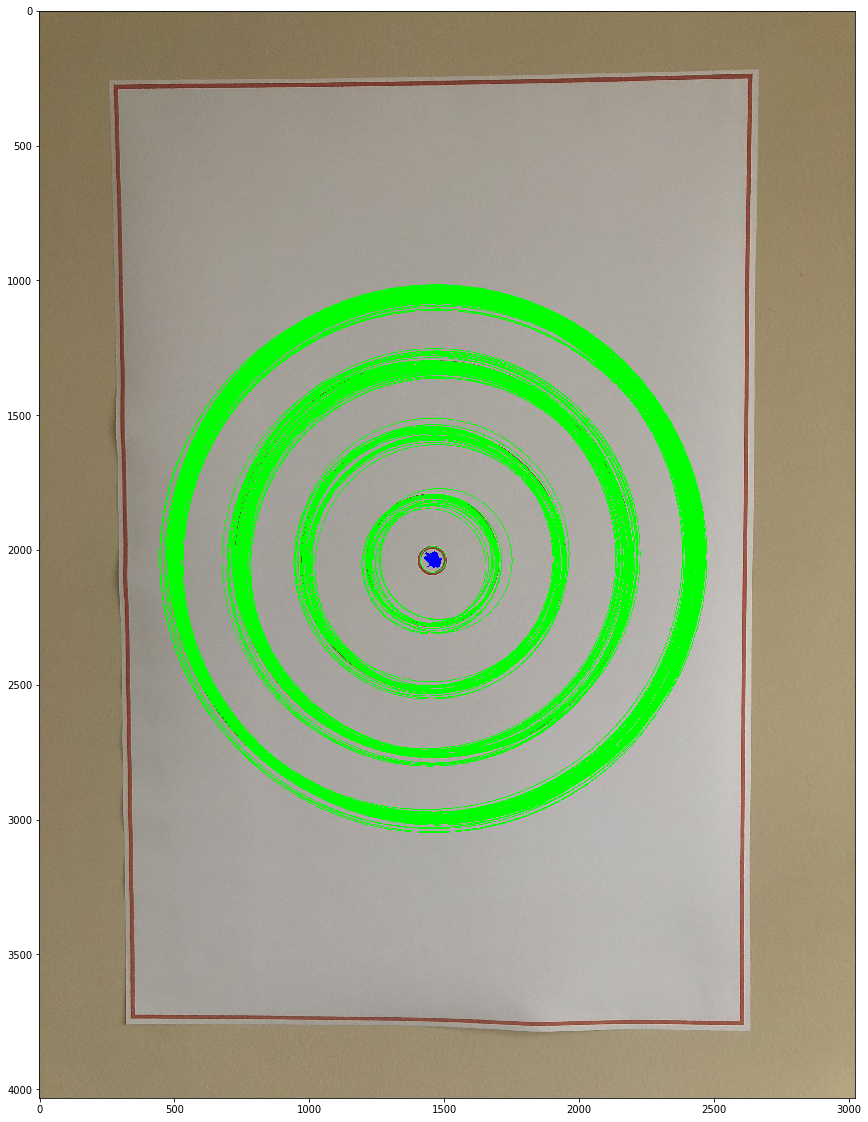

In [103]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(eroded, cv2.HOUGH_GRADIENT, 1, 
                           minDist=1,
                           param1=240,
                           param2=100,
                           minRadius=5,
                           maxRadius=1000)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
# Set the default figure size
plt.rcParams['figure.figsize'] = [20,20]

plt.imshow(circles_im)

print('Circles shape: ', circles.shape)

## Hough Circle Detection mainly adjust parameters and keep trying.